In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
average_values = {
    'rice': {'N': 120, 'P': 30, 'K': 30, 'temperature': 29, 'humidity': 80, 'ph': 7, 'rainfall': 250},
    'wheat' : {'N': 80, 'P': 40, 'K': 40, 'temperature':23 , 'humidity': 55, 'ph': 6, 'rainfall': 150},
    'cotton': {'N': 50, 'P': 30, 'K': 35, 'temperature': 27, 'humidity': 70, 'ph': 7, 'rainfall': 150}
}
data = []
for label, values in average_values.items():
    for _ in range(3000):
        entry = {feature: np.random.normal(value, value * 0.1) for feature, value in values.items()}
        entry['label'] = label
        data.append(entry)
custom_dataset = pd.DataFrame(data)
custom_dataset = custom_dataset.sample(frac=1).reset_index(drop=True)
print(custom_dataset)

               N          P          K  temperature   humidity        ph  \
0      92.777219  38.271965  37.355100    26.122427  50.651886  5.154552   
1     115.696263  31.593375  32.369551    32.221012  84.523030  7.204230   
2      54.571091  32.520757  34.933291    26.990193  75.627056  7.705061   
3     100.892867  30.085673  33.216617    34.551967  81.526957  6.859272   
4      64.610317  41.440013  38.749303    22.542141  42.442983  5.200539   
...          ...        ...        ...          ...        ...       ...   
8995   67.818670  39.918802  41.609900    20.008599  50.638307  5.855332   
8996   77.688175  44.022105  40.714505    23.989712  55.939181  6.103278   
8997   52.034610  31.921761  28.068326    27.574446  78.694563  7.396014   
8998   55.284342  28.648398  29.316464    25.884044  51.721302  7.361491   
8999   76.203291  43.232927  45.552672    22.448052  55.268358  5.368889   

        rainfall   label  
0     160.604401   wheat  
1     278.546870    rice  
2     

In [5]:
df = pd.DataFrame(data)

# Shuffle the DataFrame (optional)
df = df.sample(frac=1).reset_index(drop=True)

# Save the DataFrame to a CSV file
df.to_csv('west_dataset.csv', index=False)

print("DataFrame saved to west_dataset.csv")

DataFrame saved to west_dataset.csv


In [6]:
custom_dataset.size

72000

In [7]:
custom_dataset.max()

N              164.319713
P               56.059579
K               55.019471
temperature     38.797922
humidity       112.758857
ph               9.735911
rainfall       339.026684
label               wheat
dtype: object

In [8]:
new_df = custom_dataset
new_df.reset_index(drop=True, inplace=True)
print(new_df)

               N          P          K  temperature   humidity        ph  \
0      92.777219  38.271965  37.355100    26.122427  50.651886  5.154552   
1     115.696263  31.593375  32.369551    32.221012  84.523030  7.204230   
2      54.571091  32.520757  34.933291    26.990193  75.627056  7.705061   
3     100.892867  30.085673  33.216617    34.551967  81.526957  6.859272   
4      64.610317  41.440013  38.749303    22.542141  42.442983  5.200539   
...          ...        ...        ...          ...        ...       ...   
8995   67.818670  39.918802  41.609900    20.008599  50.638307  5.855332   
8996   77.688175  44.022105  40.714505    23.989712  55.939181  6.103278   
8997   52.034610  31.921761  28.068326    27.574446  78.694563  7.396014   
8998   55.284342  28.648398  29.316464    25.884044  51.721302  7.361491   
8999   76.203291  43.232927  45.552672    22.448052  55.268358  5.368889   

        rainfall   label  
0     160.604401   wheat  
1     278.546870    rice  
2     

In [9]:
new_df.max()

N              164.319713
P               56.059579
K               55.019471
temperature     38.797922
humidity       112.758857
ph               9.735911
rainfall       339.026684
label               wheat
dtype: object

In [10]:
new_df.size

72000

In [11]:
new_df.shape

(9000, 8)

In [12]:
new_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
new_df['label'].unique()

array(['wheat', 'rice', 'cotton'], dtype=object)

In [14]:
new_df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [15]:
new_df['label'].value_counts()

wheat     3000
rice      3000
cotton    3000
Name: label, dtype: int64

<AxesSubplot: >

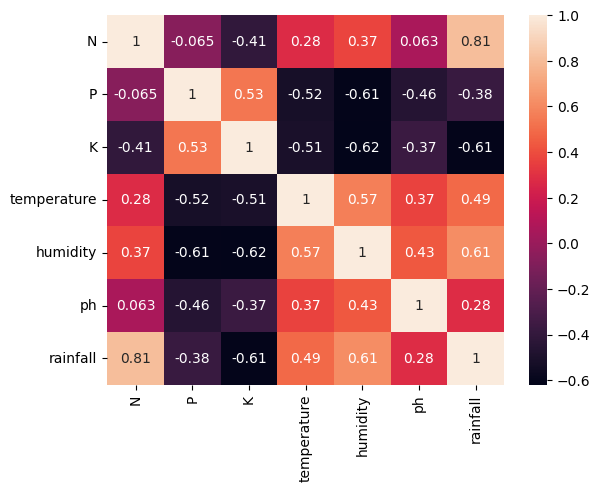

In [16]:
sns.heatmap(new_df.corr(),annot=True)

### Seperating features and target label

In [17]:
df = new_df

In [18]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [19]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [21]:
Xtrain.size, Xtest.size

(50400, 12600)

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  99.33333333333333
              precision    recall  f1-score   support

      cotton       1.00      0.99      0.99       628
        rice       0.99      1.00      1.00       575
       wheat       0.99      0.99      0.99       597

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800



In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [25]:
score

array([0.99777778, 0.99611111, 0.99611111, 0.99555556, 0.99722222])

### Saving trained Decision Tree model

In [26]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9994444444444445
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       628
        rice       1.00      1.00      1.00       575
       wheat       1.00      1.00      1.00       597

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [28]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1.        , 1.        , 0.99944444, 0.99944444, 0.99944444])

### Saving trained Guassian Naive Bayes model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.7755555555555556
              precision    recall  f1-score   support

      cotton       1.00      0.68      0.81       628
        rice       0.59      1.00      0.74       575
       wheat       1.00      0.66      0.80       597

    accuracy                           0.78      1800
   macro avg       0.86      0.78      0.78      1800
weighted avg       0.87      0.78      0.78      1800



In [31]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.79666667, 0.78333333, 0.77666667, 0.79555556, 0.80944444])

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9988888888888889
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       628
        rice       1.00      1.00      1.00       575
       wheat       1.00      1.00      1.00       597

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [33]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.99944444, 1.        , 0.99944444, 0.99944444, 0.99944444])

### Saving trained Logistic Regression model

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9972222222222222
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       628
        rice       1.00      1.00      1.00       575
       wheat       1.00      0.99      1.00       597

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [36]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99944444, 1.        , 0.99944444, 1.        , 0.99777778])

### Saving trained Random Forest model

In [37]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest_West.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [38]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the target variable
label_encoder.fit(Ytrain)

# Transform both Ytrain and Ytest
Ytrain_encoded = label_encoder.transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Now train your XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the trained model
predicted_values = XB.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

# Print classification report
print(classification_report(Ytest_encoded, predicted_values))


XGBoost's Accuracy is:  0.9983333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       628
           1       1.00      1.00      1.00       575
           2       1.00      1.00      1.00       597

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Initialize and train XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict on test data
predicted_values_encoded = XB.predict(Xtest)

# Decode the predicted values back to original labels
predicted_values = label_encoder.inverse_transform(predicted_values_encoded)

# Calculate accuracy
accuracy = metrics.accuracy_score(Ytest, predicted_values)
print("XGBoost's Accuracy is:", accuracy)

# Print classification report
print(classification_report(Ytest, predicted_values))


XGBoost's Accuracy is: 0.9983333333333333
              precision    recall  f1-score   support

      cotton       1.00      1.00      1.00       628
        rice       1.00      1.00      1.00       575
       wheat       1.00      1.00      1.00       597

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



## Accuracy Comparison

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

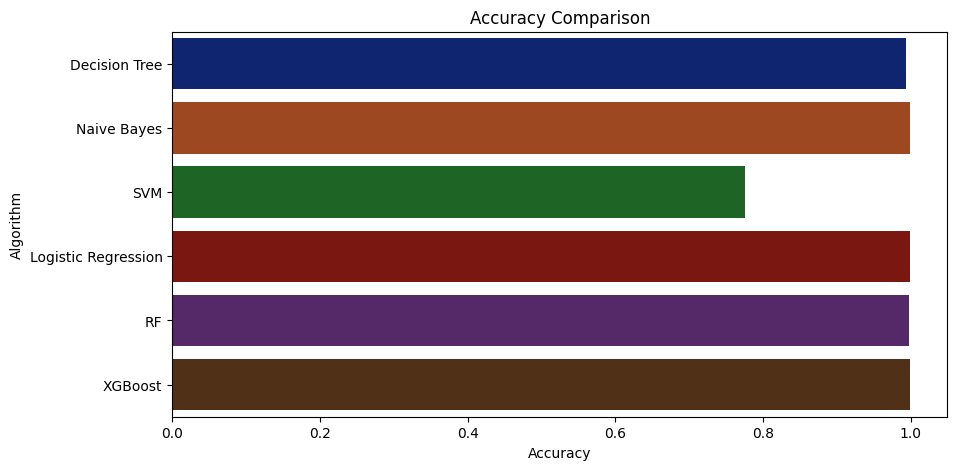

In [40]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [41]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9933333333333333
Naive Bayes --> 0.9994444444444445
SVM --> 0.7755555555555556
Logistic Regression --> 0.9988888888888889
RF --> 0.9972222222222222
XGBoost --> 0.9983333333333333


In [42]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['wheat']


In [44]:
data = np.array([[50,30, 35, 27, 82, 6.5, 140.91]])
prediction = RF.predict(data)
print(prediction)

['cotton']
